In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df_train = pd.read_csv(r'C:\Users\wangzy\Desktop\EE7207\data_train.csv')
val_data = pd.read_csv(r'C:\Users\wangzy\Desktop\EE7207\data_val.csv')
train_x = df_train.drop(['Label'], axis=1)
train_y = df_train[['Label']]
final_data = pd.read_csv(r'C:\Users\wangzy\Desktop\EE7207\data_test.csv')
final_x = val_data.drop(['Label'], axis=1)
finaltest_x = final_data.drop(['Label'], axis=1)
final_y = val_data[['Label']]
# corrmat = df_train.corr()
# f, ax = plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=1, square=True, annot=True, fmt='.2f', cmap="RdBu_r")
# plt.show()
# sns.pairplot(df_train)
# plt.show()
# x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, random_state=22)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, random_state=22, test_size=30)
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
estimator = SVC()
param_dict = {'C': [1.5],
             'kernel': ['rbf']}
estimator = GridSearchCV(estimator, param_grid = param_dict, cv = 5)
# estimator = GridSearchCV(estimator, param_grid = param_dict)
estimator.fit(x_train, y_train)

# y_predict = estimator.predict(x_test)
y_predict = estimator.predict(final_x)
final_res = estimator.predict(finaltest_x)
print(final_res)
score = estimator.score(final_x, final_y)
print('Accuracy:', score)
print('Best paramater:', estimator.best_params_)
print('Best score:', estimator.best_score_)
print('cv:', estimator.cv_results_)
print(estimator.cv_results_['mean_test_score'])
print(estimator.cv_results_['std_test_score'])
print('recall:',metrics.recall_score(final_y,y_predict, average='binary'))
print('accuracy:',metrics.accuracy_score(y_predict, final_y))
print('meantime:',np.mean(estimator.cv_results_['mean_fit_time']))

[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1]
Accuracy: 0.9666666666666667
Best paramater: {'C': 1.5, 'kernel': 'rbf'}
Best score: 0.9333333333333332
cv: {'mean_fit_time': array([0.00333729]), 'std_fit_time': array([0.00043209]), 'mean_score_time': array([0.0019928]), 'std_score_time': array([0.00063053]), 'param_C': masked_array(data=[1.5],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1.5, 'kernel': 'rbf'}], 'split0_test_score': array([0.92592593]), 'split1_test_score': array([0.94444444]), 'split2_test_score': array([0.96296296]), 'split3_test_score': array([0.90740741]), 'split4_test_score': array([0.92592593]), 'mean_test_score': array([0.93333333]), 'std_test_score': array([0.01888526]), 'rank_test_score': array([1])}
[0.93333333]
[0.01888526]
recall: 0.9545454545454546
accuracy: 0.96666666666666

[0 1]


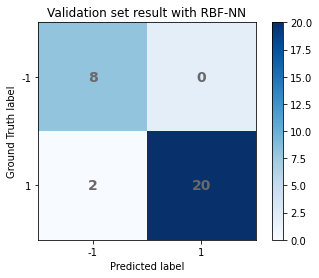

In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np
C=confusion_matrix(y_predict, final_y)

def plot_confusion_matrix(confusion_mat):
    # 画混淆矩阵图，配色风格使用cm.Greens
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Blues,)
    
    # 显示colorbar
    plt.colorbar()
    
    # 使用annotate在图中显示混淆矩阵的数据
    for x in range(len(confusion_mat)):
        for y in range(len(confusion_mat)):
            if confusion_mat[x, y] > 100:
                plt.annotate(confusion_mat[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center',fontsize=14, c='whitesmoke', fontweight='bold')
            else:
                plt.annotate(confusion_mat[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center',fontsize=14, c='dimgray', fontweight='bold')
            # 第一个参数是注释的内容
            # xy设置箭头尖的坐标
            # horizontalalignment水平对齐
            # verticalalignment垂直对齐
            # 其余常用参数如下：
            # xytext设置注释内容显示的起始位置
            # arrowprops 用来设置箭头
            # facecolor 设置箭头的颜色
            # headlength 箭头的头的长度
            # headwidth 箭头的宽度
            # width 箭身的宽度

    plt.title('Validation set result with RBF-NN')     # 图标title
    plt.ylabel('Ground Truth label')          # 坐标轴标签
    plt.xlabel('Predicted label')     # 坐标轴标签
    
    tick_marks = np.arange(len(confusion_mat))
    plt.xticks([0, 1], ['-1', '1'])
    plt.yticks([0, 1], ['-1', '1'])
    plt.show()
plot_confusion_matrix(C)

time cost 0.012588262557983398 s
Accuracy: 0.9666666666666667
[0 1]


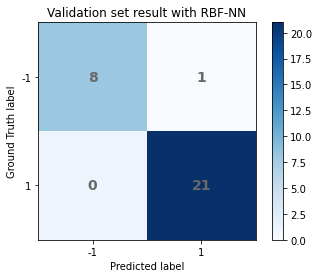

In [5]:
import time
time_start = time.time()
final_estimator = SVC(C=1.5, kernel='rbf')
final_estimator.fit(train_x, train_y)
final_predict = final_estimator.predict(final_x)
final_estimator.score(final_x, final_y)
time_end = time.time()
print('time cost',time_end-time_start,'s')
print('Accuracy:', final_estimator.score(final_x, final_y))
C=confusion_matrix(final_y, final_predict)
plot_confusion_matrix(C)

time cost 0.45845746994018555 s
Accuracy: 0.9666666666666667
[0 1]


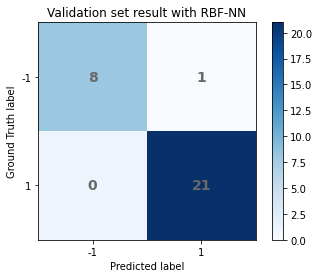

In [6]:
import time
time_start = time.time()
final_estimator = RandomForestClassifier(max_depth=500, n_estimators=300)
final_estimator.fit(train_x, train_y)
final_predict = final_estimator.predict(final_x)
final_estimator.score(final_x, final_y)
time_end = time.time()
print('time cost',time_end-time_start,'s')
print('Accuracy:', final_estimator.score(final_x, final_y))
C=confusion_matrix(final_y, final_predict)
plot_confusion_matrix(C)